# Bitcoin Block Time Data Analysis 
### by Tim Guo

In [1]:
import pandas as pd
from datetime import timedelta
from bitcoin_block_data_collection_multi_thread import Get_Current_dir
from matplotlib import pyplot as plt
import numpy as np

In [4]:
dir=Get_Current_dir()
# df=pd.read_csv(dir+'/data/data_preprocessing_copy.csv')
df=pd.read_csv(dir+'/data/data_preprocessing_new_combine.csv')
df.sort_values(by=['height'], inplace=True)
df.drop_duplicates(subset=['height'], inplace=True)
df.reset_index(inplace=True, drop=True)
df = df[['height','time']]
print(df.head(1000))

     height        time
0         0  1231006505
1         1  1231469665
2         2  1231469744
3         3  1231470173
4         4  1231470988
5         5  1231471428
6         6  1231471789
7         7  1231472369
8         8  1231472743
9         9  1231473279
10       10  1231473952
11       11  1231474360
12       12  1231474888
13       13  1231475020
14       14  1231475589
15       15  1231562746
16       16  1231562758
17       17  1231563791
18       18  1231564334
19       19  1231564974
20       20  1231565995
21       21  1231566553
22       22  1231567467
23       23  1231567611
24       24  1231568277
25       25  1231568646
26       26  1231570450
27       27  1231570573
28       28  1231601457
29       29  1231601503
30       30  1231602122
31       31  1231602736
32       32  1231603171
33       33  1231603939
34       34  1231604338
35       35  1231605153
36       36  1231605789
37       37  1231606762
38       38  1231607488
39       39  1231607511
40       40  123

In [5]:
# ====calculate time between two consecutive blocks
# df['time']=pd.to_datetime(df['time'])
df['time_between_two_consecutive_blocks'] =(df['time'].shift(-1).copy()-df['time'].copy()).shift(1)
print(df.head(500))

     height        time  time_between_two_consecutive_blocks
0         0  1231006505                                  NaN
1         1  1231469665                             463160.0
2         2  1231469744                                 79.0
3         3  1231470173                                429.0
4         4  1231470988                                815.0
5         5  1231471428                                440.0
6         6  1231471789                                361.0
7         7  1231472369                                580.0
8         8  1231472743                                374.0
9         9  1231473279                                536.0
10       10  1231473952                                673.0
11       11  1231474360                                408.0
12       12  1231474888                                528.0
13       13  1231475020                                132.0
14       14  1231475589                                569.0
15       15  1231562746 

In [8]:
# ====find two consecutive blocks mined more than 2 hours and mark the time
#     note: we always mark the later block which is the block mined more than 2 hours from the former block
# condition = df['time_between_two_consecutive_blocks']>=(timedelta(hours=2))
condition = df['time_between_two_consecutive_blocks']>=(2*3600)
df.loc[condition,'time_marked']=df['time']
print(df)

        height        time  time_between_two_consecutive_blocks   time_marked
0            0  1231006505                                  NaN           NaN
1            1  1231469665                             463160.0  1.231470e+09
2            2  1231469744                                 79.0           NaN
3            3  1231470173                                429.0           NaN
4            4  1231470988                                815.0           NaN
...        ...         ...                                  ...           ...
719996  719996  1642915660                                 39.0           NaN
719997  719997  1642917106                               1446.0           NaN
719998  719998  1642917332                                226.0           NaN
719999  719999  1642918512                               1180.0           NaN
720000  720000  1642919046                                534.0           NaN

[720001 rows x 4 columns]


In [9]:
# ====count the number of the incident(two consecutive blocks mined more than 2 hours) happens
incident_happen_times = df['time_marked'].count()
print('incident_happen_times',incident_happen_times)

incident_happen_times 152


In [10]:
# ====get rid of other data since we only care about incidents
incident_collection=df[df['time_marked'].notnull()][['height','time_marked']]
print(incident_collection.head(500))

        height   time_marked
1            1  1.231470e+09
15          15  1.231563e+09
28          28  1.231601e+09
79          79  1.231646e+09
163        163  1.231715e+09
169        169  1.231731e+09
1296      1296  1.232583e+09
1389      1389  1.232683e+09
1390      1390  1.232696e+09
1398      1398  1.232722e+09
1916      1916  1.232961e+09
1917      1917  1.232972e+09
8211      8211  1.237623e+09
8226      8226  1.237658e+09
8231      8231  1.237683e+09
11964    11964  1.240482e+09
11966    11966  1.240496e+09
13082    13082  1.241319e+09
13889    13889  1.241910e+09
13898    13898  1.241945e+09
15048    15048  1.242767e+09
15222    15222  1.242901e+09
15228    15228  1.242914e+09
15324    15324  1.243090e+09
15331    15331  1.243103e+09
15424    15424  1.243187e+09
15818    15818  1.243484e+09
16215    16215  1.243816e+09
16271    16271  1.243872e+09
16286    16286  1.243901e+09
16468    16468  1.244074e+09
16490    16490  1.244125e+09
16564    16564  1.244275e+09
16588    16588

In [11]:
# ====calculate the time interval between every two incidents i.e. how long would it take for one incident
# to happen before the previous incident
incident_collection['time_between_each_incident']=(incident_collection['time_marked'].shift(-1)-incident_collection['time_marked']).shift(1)
print(incident_collection)

        height   time_marked  time_between_each_incident
1            1  1.231470e+09                         NaN
15          15  1.231563e+09                     93081.0
28          28  1.231601e+09                     38711.0
79          79  1.231646e+09                     44150.0
163        163  1.231715e+09                     69310.0
169        169  1.231731e+09                     15606.0
1296      1296  1.232583e+09                    852211.0
1389      1389  1.232683e+09                     99846.0
1390      1390  1.232696e+09                     13455.0
1398      1398  1.232722e+09                     25653.0
1916      1916  1.232961e+09                    238944.0
1917      1917  1.232972e+09                     11766.0
8211      8211  1.237623e+09                   4650997.0
8226      8226  1.237658e+09                     34185.0
8231      8231  1.237683e+09                     25711.0
11964    11964  1.240482e+09                   2799147.0
11966    11966  1.240496e+09   

In [17]:
# ====calculate the average time that the incident(two consecutive blocks mined more than 2 hours) occurs
average_time_incident_occurs = incident_collection['time_between_each_incident'].sum()/incident_collection['time_between_each_incident'].count()

print('average_time_incident_occurs in seconds:',(average_time_incident_occurs))
print('average time in hours:',int(average_time_incident_occurs)/(3600))
print('average time in days:',int(average_time_incident_occurs)/(3600*24))

average_time_incident_occurs in seconds: 2607112.238410596
average time in hours: 724.1977777777778
average time in days: 30.174907407407407


In [18]:
# df['timestamp']=((df['time'])-pd.Timestamp("1970-01-01"))//pd.Timedelta('1s')
df['interval']=(df['time'].shift(-1).copy()-df['time'].copy()).shift(1)

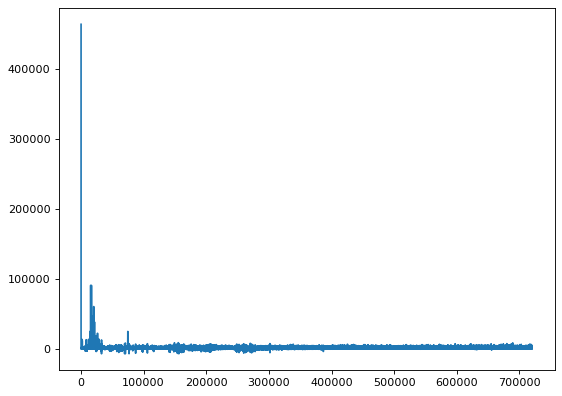

In [19]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
plt.plot(df['height'],df['interval'])
plt.show()